In [63]:
# read CT imaging
import matplotlib.pyplot as plt
%matplotlib inline
import pydicom
from pydicom.data import get_testdata_files
plt.rcParams['figure.figsize'] = [10, 8]
print(__doc__)

Automatically created module for IPython interactive environment


In [92]:
from os import listdir
from os.path import isfile, join
def load_data(path = ''):

        # reading files from folders
        filenames = [f for f in listdir(path) if isfile(join(path, f))]
        return filenames
def load_data_dfs(path = '', depth = 0, data_all = [], path_all= []):
        # reading files from folders
        if depth == 0:
            filenames = [f for f in listdir(path) if isfile(join(path, f))]
            data_all.append(filenames)
            path_all.append(path)
            return
        for f in listdir(path):
            load_data_dfs(join(path, f), depth - 1, data_all, path_all)
        return

In [93]:
low_data_all = []
low_path_all = []
low_path = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/'
load_data_dfs(low_path, 2, low_data_all, low_path_all)

In [109]:
std_data_all = []
std_path_all = []
std_path = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/'
load_data_dfs(std_path, 2, std_data_all, std_path_all)

In [110]:
std_path_all

['/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/HHCT200100645/1259954',
 '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/HHCT200100668/1260129',
 '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/HHCT200100667/1260120',
 '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/HHCT200100663/1260083']

In [104]:
low_path_all

['/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/CT300125596/1262707',
 '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/HHCT100376357/1266170',
 '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/CT300125528/1262313',
 '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/HHCT100374544/1260313']

In [108]:
len(low_data_all[3]), len(low_path_all)

(236, 4)

In [113]:
len(std_data_all[3]), len(std_path_all)

(345, 4)

In [133]:
def plot_ct(dataset):
    # Normal mode:
    print()
    #print("Filename.........:", filename)
    print("Storage type.....:", dataset.SOPClassUID)
    print()
    
    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name...:", display_name)
    print("Patient id.......:", dataset.PatientID)
    print("Modality.........:", dataset.Modality)
    print("Study Date.......:", dataset.StudyDate)

    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

    # use .get() if not sure the item exists, and want a default value if missing
    print("Slice location...:", dataset.get('SliceLocation', "(missing)"))
    fig = plt.figure(figsize=(10,16))
    # plot the image using matplotlib
    ax = fig.add_subplot(211)
    ax.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    ax = fig.add_subplot(212)
    ax.hist(dataset.pixel_array[::])

### disable auto scrolling

In [59]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [84]:
listdir('/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/')

['High', '.DS_Store', 'Low']

index [102 270 106  71 188]

Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Zhu Wei Hua, 
Patient id.......: HHCT100376357
Modality.........: CT
Study Date.......: 20200127
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.724609375, 0.724609375]
Slice location...: -30.91

Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Zhu Wei Hua, 
Patient id.......: HHCT100376357
Modality.........: CT
Study Date.......: 20200127
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.724609375, 0.724609375]
Slice location...: -7.91

Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Zhu Wei Hua, 
Patient id.......: HHCT100376357
Modality.........: CT
Study Date.......: 20200127
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.724609375, 0.724609375]
Slice location...: 66.09

Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Zhu Wei Hua, 
Patient id.......: HHCT100376357
Modality.........: CT
Study

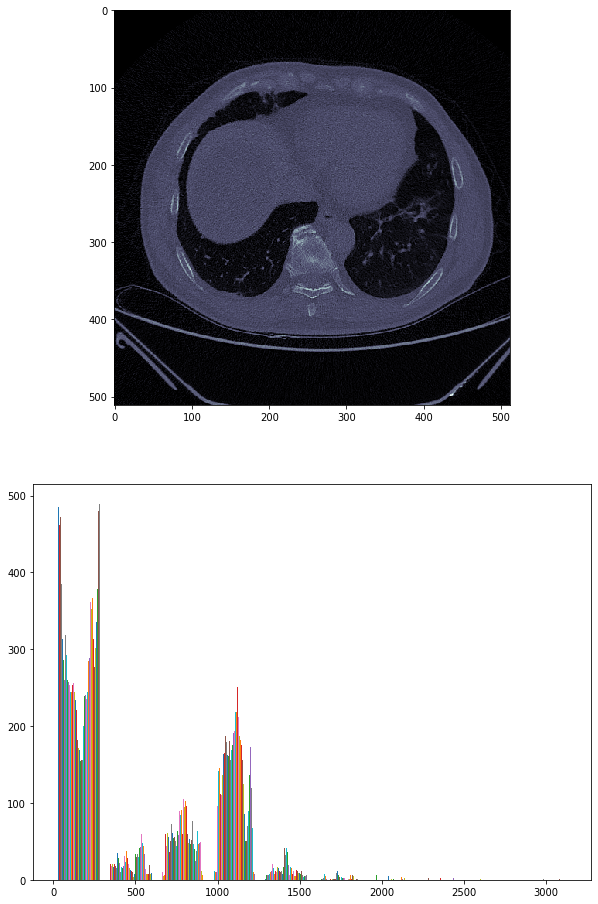

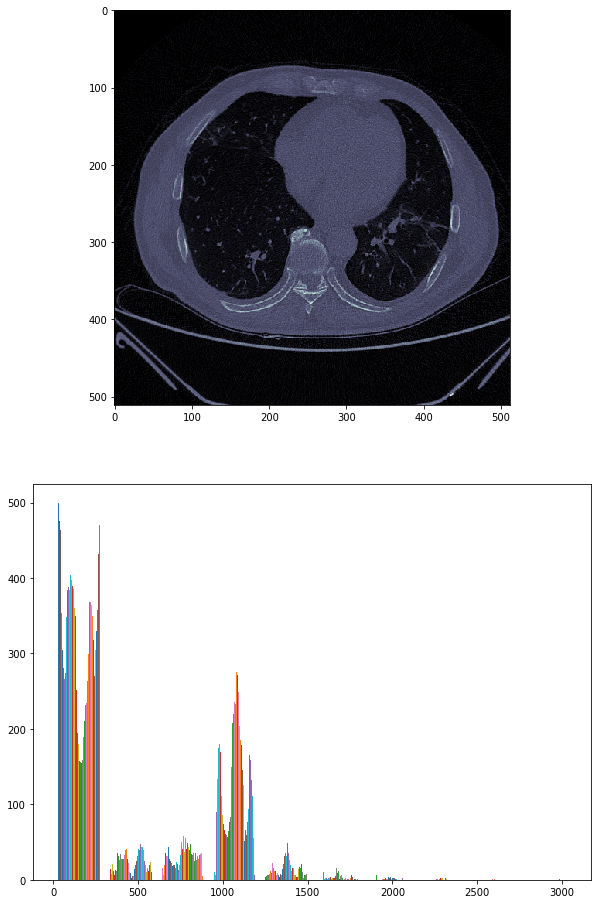

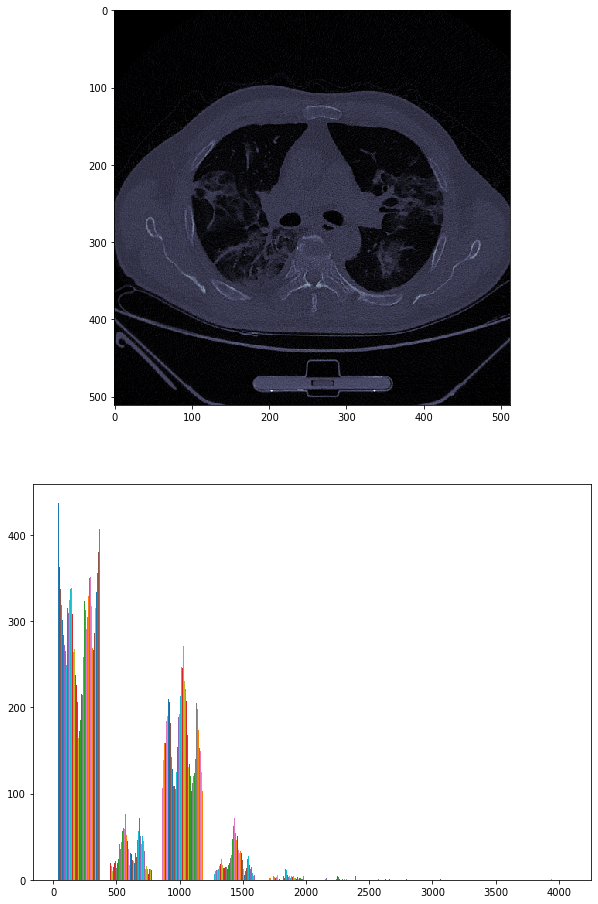

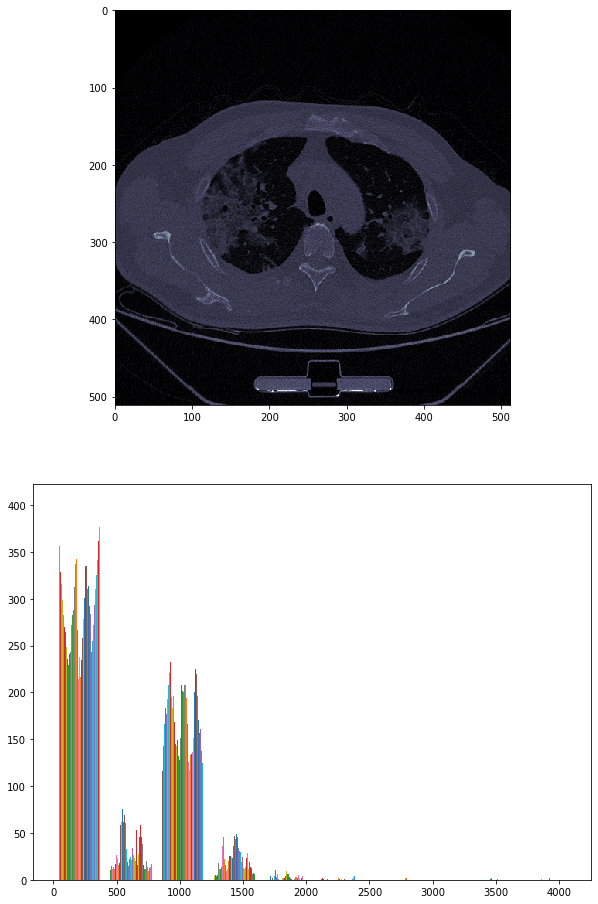

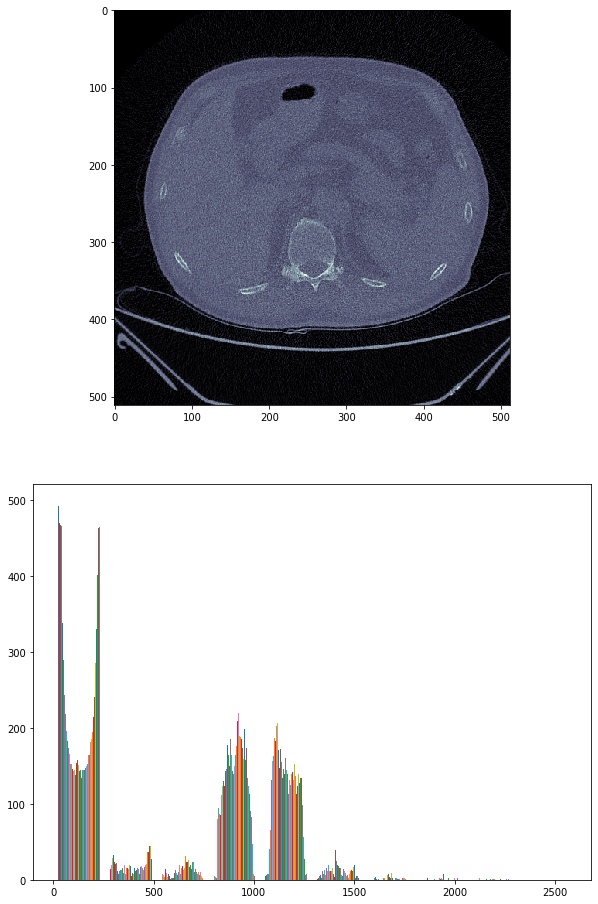

In [134]:
path = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/CT300125528/1262313/'
path = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/CT300125596/1262707/'
path = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/HHCT100374544/1260313/'
path = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/Low/HHCT100376357/1266170/'
filename = load_data(path)
dataset = pydicom.dcmread(join(path, filename[0]))
np.random.seed(42)
# random sampling + visulizations
index = np.random.randint(low=0, high=len(filename), size=5)
print('index', index)
for i in index:
    dataset = pydicom.dcmread(join(path, filename[i]))
    plot_ct(dataset)

index [102 270 106  71 188]

Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Peng Bo, 
Patient id.......: HHCT200100663
Modality.........: CT
Study Date.......: 20200120
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.78515625, 0.78515625]
Slice location...: -124.5


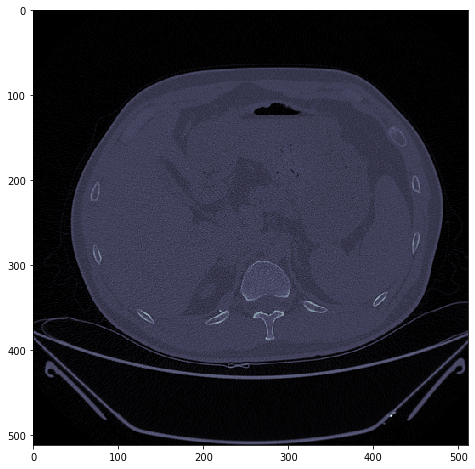


Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Peng Bo, 
Patient id.......: HHCT200100663
Modality.........: CT
Study Date.......: 20200120
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.78515625, 0.78515625]
Slice location...: -28.5


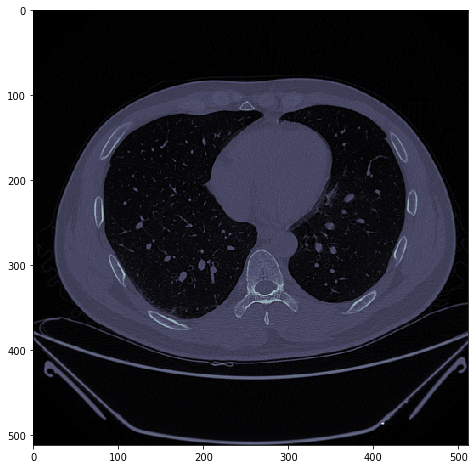


Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Peng Bo, 
Patient id.......: HHCT200100663
Modality.........: CT
Study Date.......: 20200120
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.78515625, 0.78515625]
Slice location...: -101.5


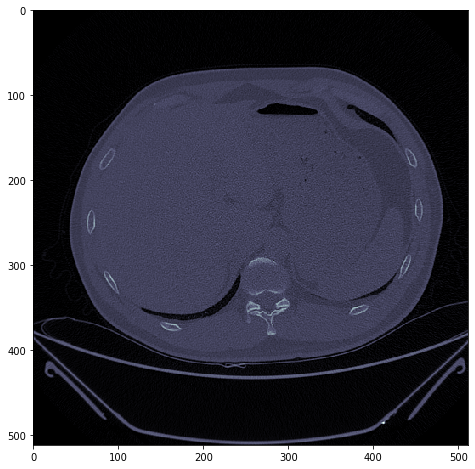


Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Peng Bo, 
Patient id.......: HHCT200100663
Modality.........: CT
Study Date.......: 20200120
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.78515625, 0.78515625]
Slice location...: 30.5


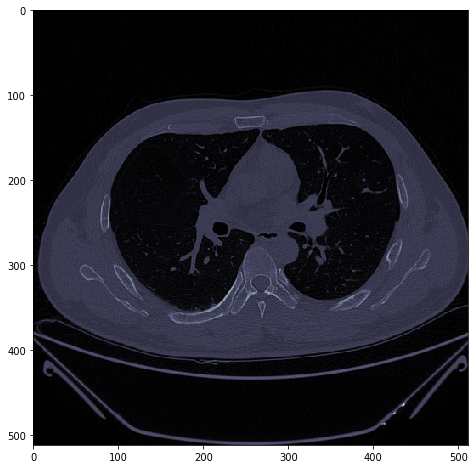


Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: Peng Bo, 
Patient id.......: HHCT200100663
Modality.........: CT
Study Date.......: 20200120
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.78515625, 0.78515625]
Slice location...: 0.5


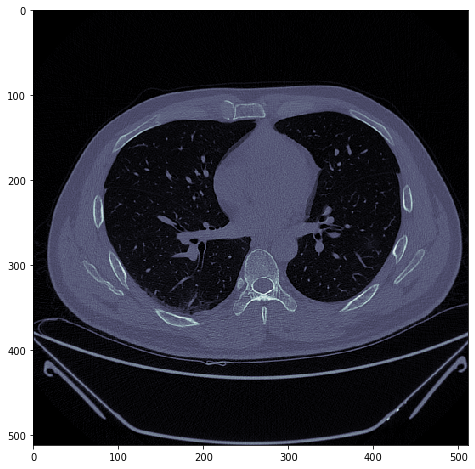

In [79]:
import numpy as np
np.random.seed(42)
path_high = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/HHCT200100667/1260120/'
path_high = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/HHCT200100645/1259954/'
path_high = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/HHCT200100668/1260129/'
path_high = '/Users/ningxin/Dropbox/Research/FHE_Meeting5th/CT/High/HHCT200100663/1260083/'
filename_high = load_data(path_high)

# random sampling + visulizations
index = np.random.randint(low=0,high=len(filename_high),size=5)
print('index', index)
for i in index:
    dataset = pydicom.dcmread(join(path_high, filename_high[i]))
    plot_ct(dataset)